In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
X_train, X_test, y_train, y_test = load('../../classification_data.joblib')
models_trees = load('trees.joblib')
models_knn = load('knn.joblib')

In [7]:
models_trees

[DecisionTreeClassifier(random_state=55),
 DecisionTreeClassifier(criterion='entropy', max_depth=45, random_state=55),
 RandomForestClassifier(random_state=55),
 RandomForestClassifier(n_estimators=300, random_state=55)]

In [8]:
models_knn

[KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=25, p=1, weights='distance')]

In [9]:
models = models_trees + models_knn
models

[DecisionTreeClassifier(random_state=55),
 DecisionTreeClassifier(criterion='entropy', max_depth=45, random_state=55),
 RandomForestClassifier(random_state=55),
 RandomForestClassifier(n_estimators=300, random_state=55),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=25, p=1, weights='distance')]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [11]:
def model_info(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred))
    print('Recall score: ', recall_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred))

In [12]:
def build_model(model, X_train, X_test, y_train, y_test):
    # model.fit(X_train, y_train)

    print('Train data:\n')
    y_train_pred = model.predict(X_train)
    model_info(y_train, y_train_pred)
    
    print('\n--------------------------------------\n')

    print('Test data:\n')
    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)

    return model, y_train_pred, y_pred

In [13]:
y_train_pred_values = []
y_pred_values = []
for model in models:
    model, y_train_pred, y_pred = build_model(model, X_train, X_test, y_train, y_test)
    y_train_pred_values.append(y_train_pred)
    y_pred_values.append(y_pred)
    print('\n*************************************\n')

Train data:

Confusion matrix: 
 [[47918   114]
 [  181 49697]]
Accuracy score:  0.9969870289040956
Precision score:  0.9977113488988376
Recall score:  0.9963711455952524
F1 score:  0.9970407968782915

--------------------------------------

Test data:

Confusion matrix: 
 [[ 9812  2152]
 [ 2118 10396]]
Accuracy score:  0.8255576435983332
Precision score:  0.8284985655084476
Recall score:  0.8307495604922487
F1 score:  0.829622536110446

*************************************

Train data:

Confusion matrix: 
 [[47687   345]
 [  221 49657]]
Accuracy score:  0.9942191808804004
Precision score:  0.9931002759889604
Recall score:  0.9955691888207225
F1 score:  0.9943331998398078

--------------------------------------

Test data:

Confusion matrix: 
 [[ 9776  2188]
 [ 2077 10437]]
Accuracy score:  0.8257619086526677
Precision score:  0.8266930693069307
Recall score:  0.8340258910020777
F1 score:  0.8303432913003699

*************************************

Train data:

Confusion matrix: 
 [[47

In [14]:
accuracy_train = []
precision_train = []
recall_train = []
f1_train = []

accuracy_test = []
precision_test = []
recall_test = []
f1_test = []

for y_train_pred, y_pred in zip(y_train_pred_values, y_pred_values):
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    precision_train.append(precision_score(y_train, y_train_pred))
    recall_train.append(recall_score(y_train, y_train_pred))
    f1_train.append(f1_score(y_train, y_train_pred))

    accuracy_test.append(accuracy_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))

(0.0, 1.0)

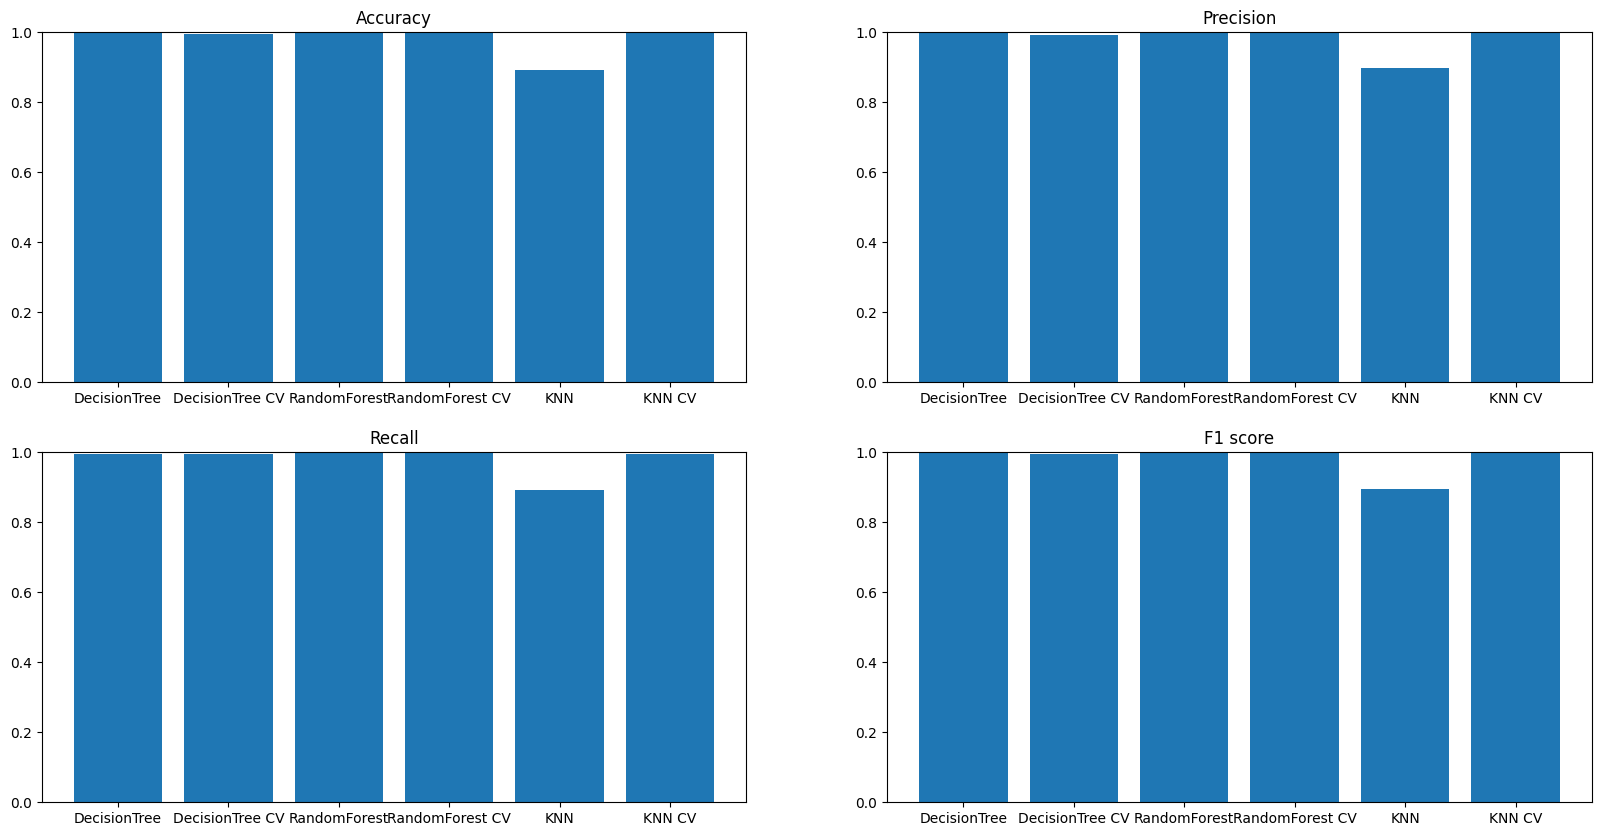

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

model_names = ['DecisionTree', 'DecisionTree CV', 'RandomForest', 'RandomForest CV', 'KNN', 'KNN CV']

axes[0, 0].bar(model_names, accuracy_train)
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)

axes[0, 1].bar(model_names, precision_train)
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0, 1)

axes[1, 0].bar(model_names, recall_train)
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim(0, 1)

axes[1, 1].bar(model_names, f1_train)
axes[1, 1].set_title('F1 score')
axes[1, 1].set_ylim(0, 1)


(0.0, 1.0)

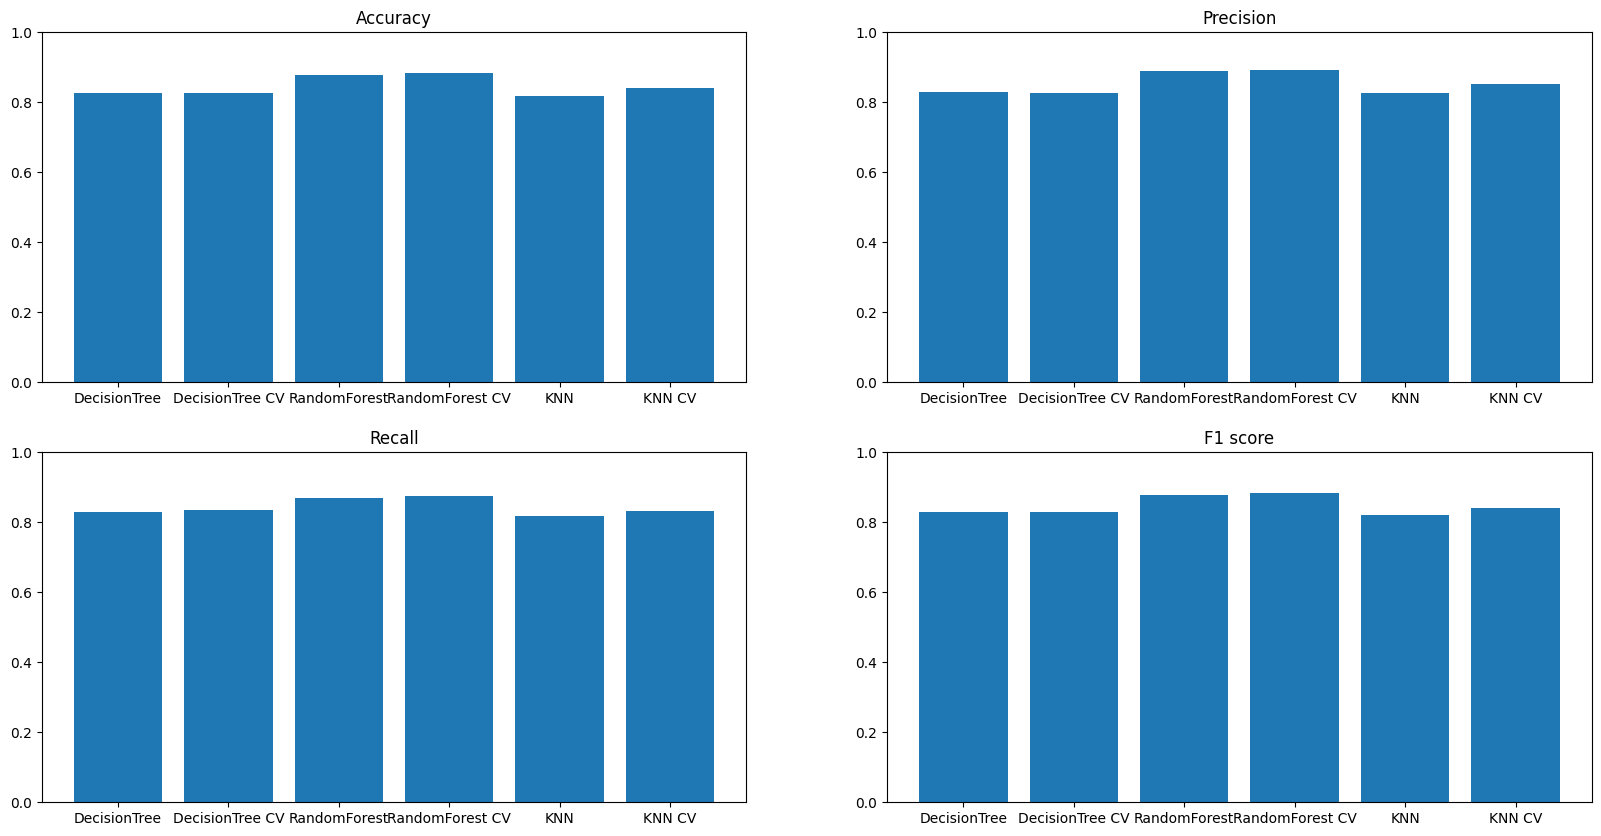

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

axes[0, 0].bar(model_names, accuracy_test)
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)

axes[0, 1].bar(model_names, precision_test)
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0, 1)

axes[1, 0].bar(model_names, recall_test)
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim(0, 1)

axes[1, 1].bar(model_names, f1_test)
axes[1, 1].set_title('F1 score')
axes[1, 1].set_ylim(0, 1)
